# OpenCV Feature Detection Tutorial

This notebook explores feature detection techniques in OpenCV, including corner detection, keypoint detection, and contour analysis.

## Contents
1. [Setup and Installation](#setup)
2. [Corner Detection](#corners)
3. [Keypoint Detection](#keypoints)
4. [Contour Detection and Analysis](#contours)
5. [Feature Matching](#matching)
6. [Practical Applications](#applications)
7. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [12]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from feature_detection import corner_detection, keypoint_detection, contour_detection
from basic_operations import image_io, display
from utils import visualization

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


# Create Sample Images for Feature Detection

Let's create and load images with various features for detection.

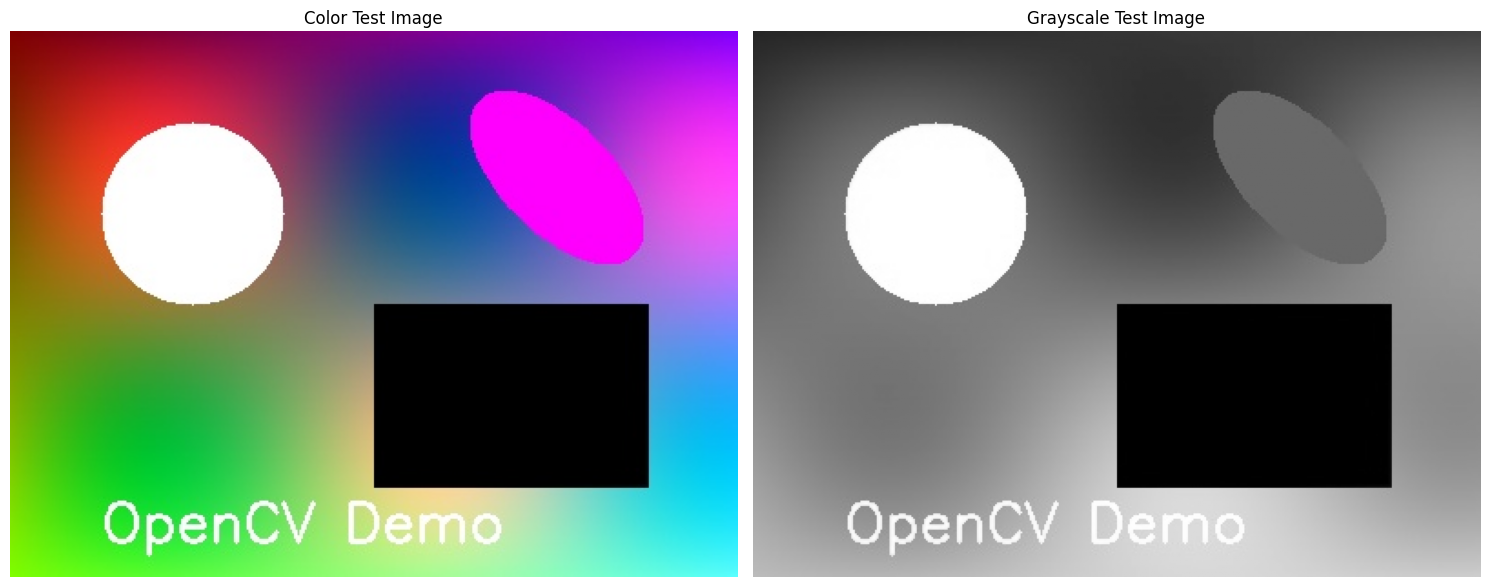

Image shape: (300, 400, 3)
Grayscale shape: (300, 400)


In [13]:
# Load sample image
image_path = '../sample_images/original/demo_image.jpg'
if os.path.exists(image_path):
    image = image_io.load_image(image_path)
else:
    # Create a demo image with various features
    image = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # Add rectangles (corners)
    cv2.rectangle(image, (50, 50), (200, 150), (255, 0, 0), 3)
    cv2.rectangle(image, (250, 50), (400, 150), (0, 255, 0), -1)
    
    # Add circles
    cv2.circle(image, (500, 100), 50, (0, 0, 255), 3)
    cv2.circle(image, (150, 250), 30, (255, 255, 0), -1)
    
    # Add lines (edges)
    cv2.line(image, (50, 200), (550, 200), (255, 255, 255), 3)
    cv2.line(image, (50, 300), (550, 350), (128, 128, 128), 3)
    
    # Add a triangle
    triangle_pts = np.array([[300, 250], [400, 250], [350, 350]], np.int32)
    cv2.fillPoly(image, [triangle_pts], (255, 128, 0))
    
    # Add some texture pattern
    for i in range(10, 600, 20):
        for j in range(10, 400, 20):
            if (i + j) % 40 == 0:
                cv2.circle(image, (i, j), 2, (200, 200, 200), -1)

# Convert to grayscale for some operations
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the test image
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Color Test Image')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Test Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Image shape: {image.shape}")
print(f"Grayscale shape: {gray_image.shape}")

## 2. Corner Detection {#corners}

Corner detection identifies points where two edges meet, which are important features for image analysis.

### 2.1 Harris Corner Detection
The Harris corner detector finds corners by analyzing the gradient structure of the image.

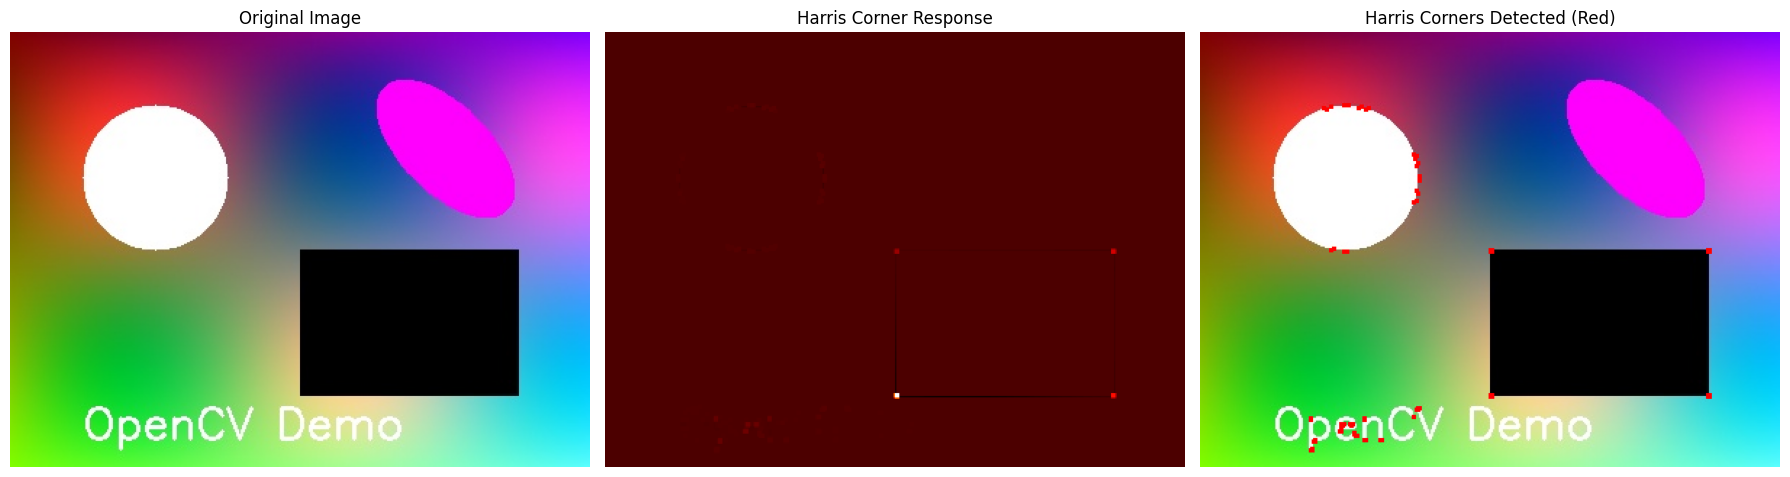

Harris corners detected: 436


In [14]:
# Apply Harris corner detection
harris_corners, harris_response = corner_detection.harris_corners(
    gray_image, 
    block_size=2, 
    ksize=3, 
    k=0.04,
    threshold=0.01
)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Harris response
axes[1].imshow(harris_response, cmap='hot')
axes[1].set_title('Harris Corner Response')
axes[1].axis('off')

# Detected corners
image_with_harris = image.copy()
image_with_harris[harris_corners] = [0, 0, 255]
axes[2].imshow(cv2.cvtColor(image_with_harris, cv2.COLOR_BGR2RGB))
axes[2].set_title('Harris Corners Detected (Red)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Harris corners detected: {np.sum(harris_corners)}")

### 2.2 Shi-Tomasi Corner Detection
Good Features to Track algorithm, which is an improvement over Harris corners.

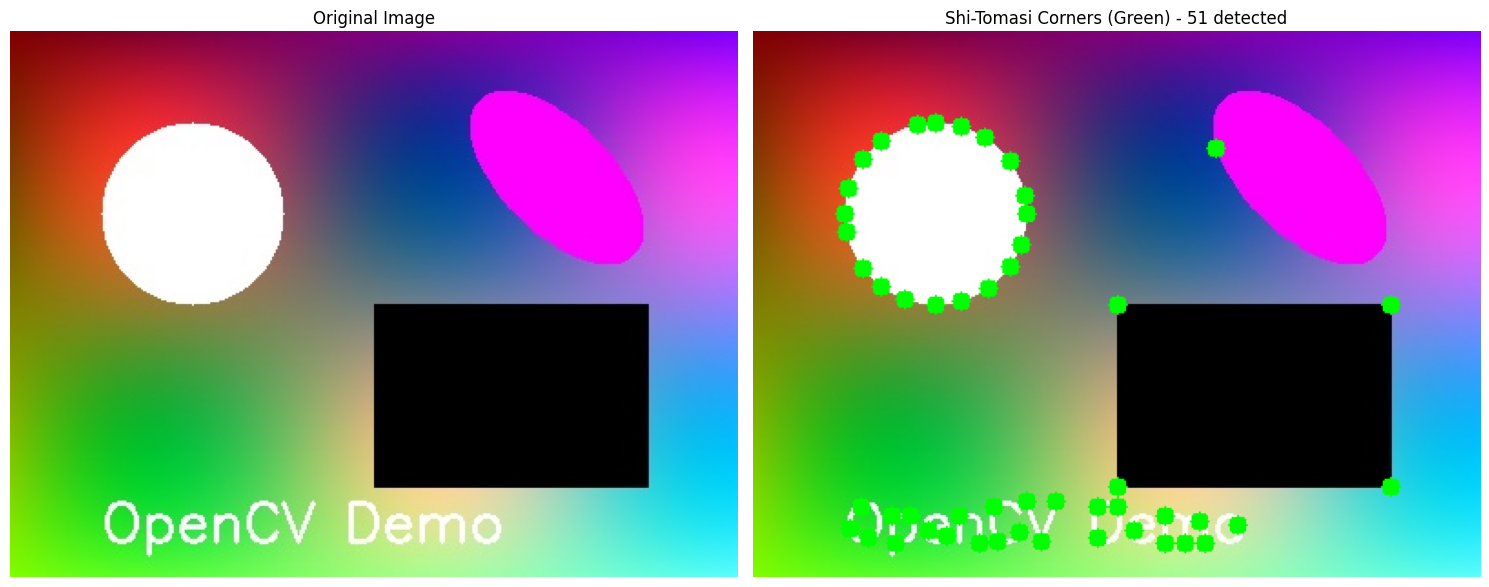

In [15]:
# Apply Shi-Tomasi corner detection
corners_shi_tomasi = corner_detection.shi_tomasi_corners(
    gray_image,
    max_corners=100,
    quality_level=0.01,
    min_distance=10
)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Shi-Tomasi corners
image_with_shi_tomasi = image.copy()
if corners_shi_tomasi is not None:
    for corner in corners_shi_tomasi:
        x, y = corner.ravel()
        cv2.circle(image_with_shi_tomasi, (int(x), int(y)), 5, (0, 255, 0), -1)

axes[1].imshow(cv2.cvtColor(image_with_shi_tomasi, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Shi-Tomasi Corners (Green) - {len(corners_shi_tomasi) if corners_shi_tomasi is not None else 0} detected')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.3 FAST Corner Detection
Features from Accelerated Segment Test - a high-speed corner detection algorithm.

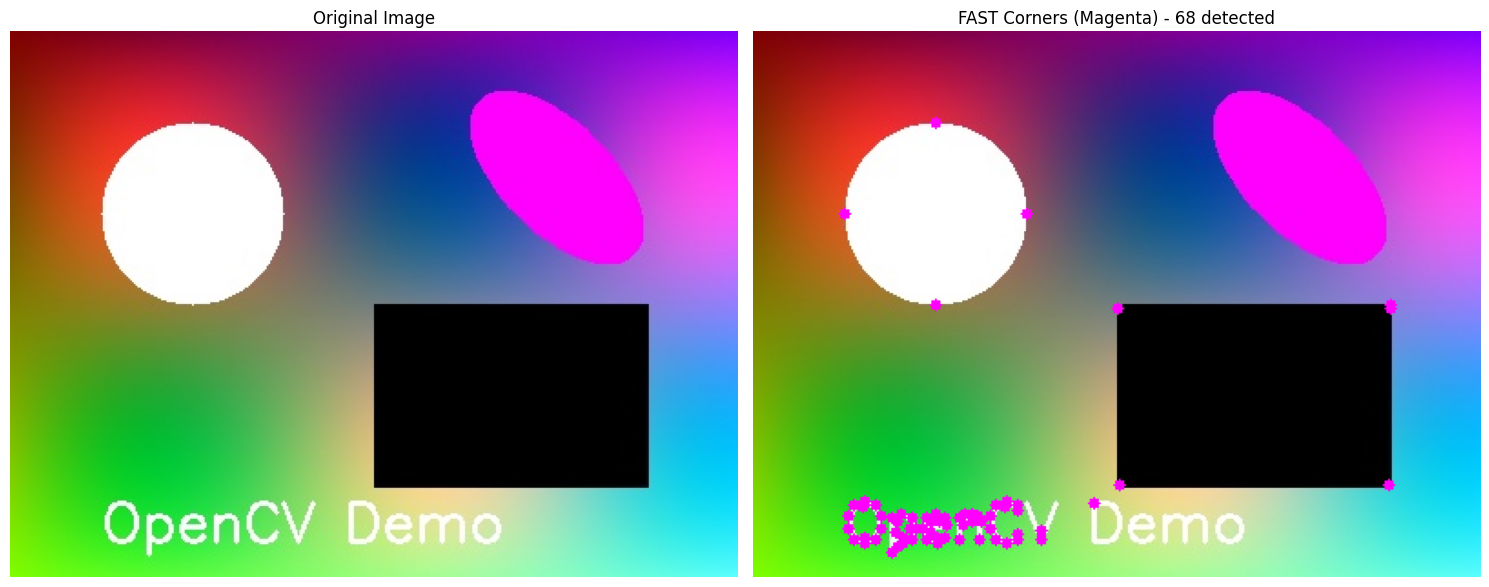

In [16]:
# Apply FAST corner detection
fast_keypoints, fast_response = corner_detection.fast_corners(
    gray_image,
    threshold=50,
    non_max_suppression=True
)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# FAST corners
image_with_fast = image.copy()
for kp in fast_keypoints:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    cv2.circle(image_with_fast, (x, y), 3, (255, 0, 255), -1)

axes[1].imshow(cv2.cvtColor(image_with_fast, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'FAST Corners (Magenta) - {len(fast_keypoints)} detected')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.4 Comparison of Corner Detection Methods

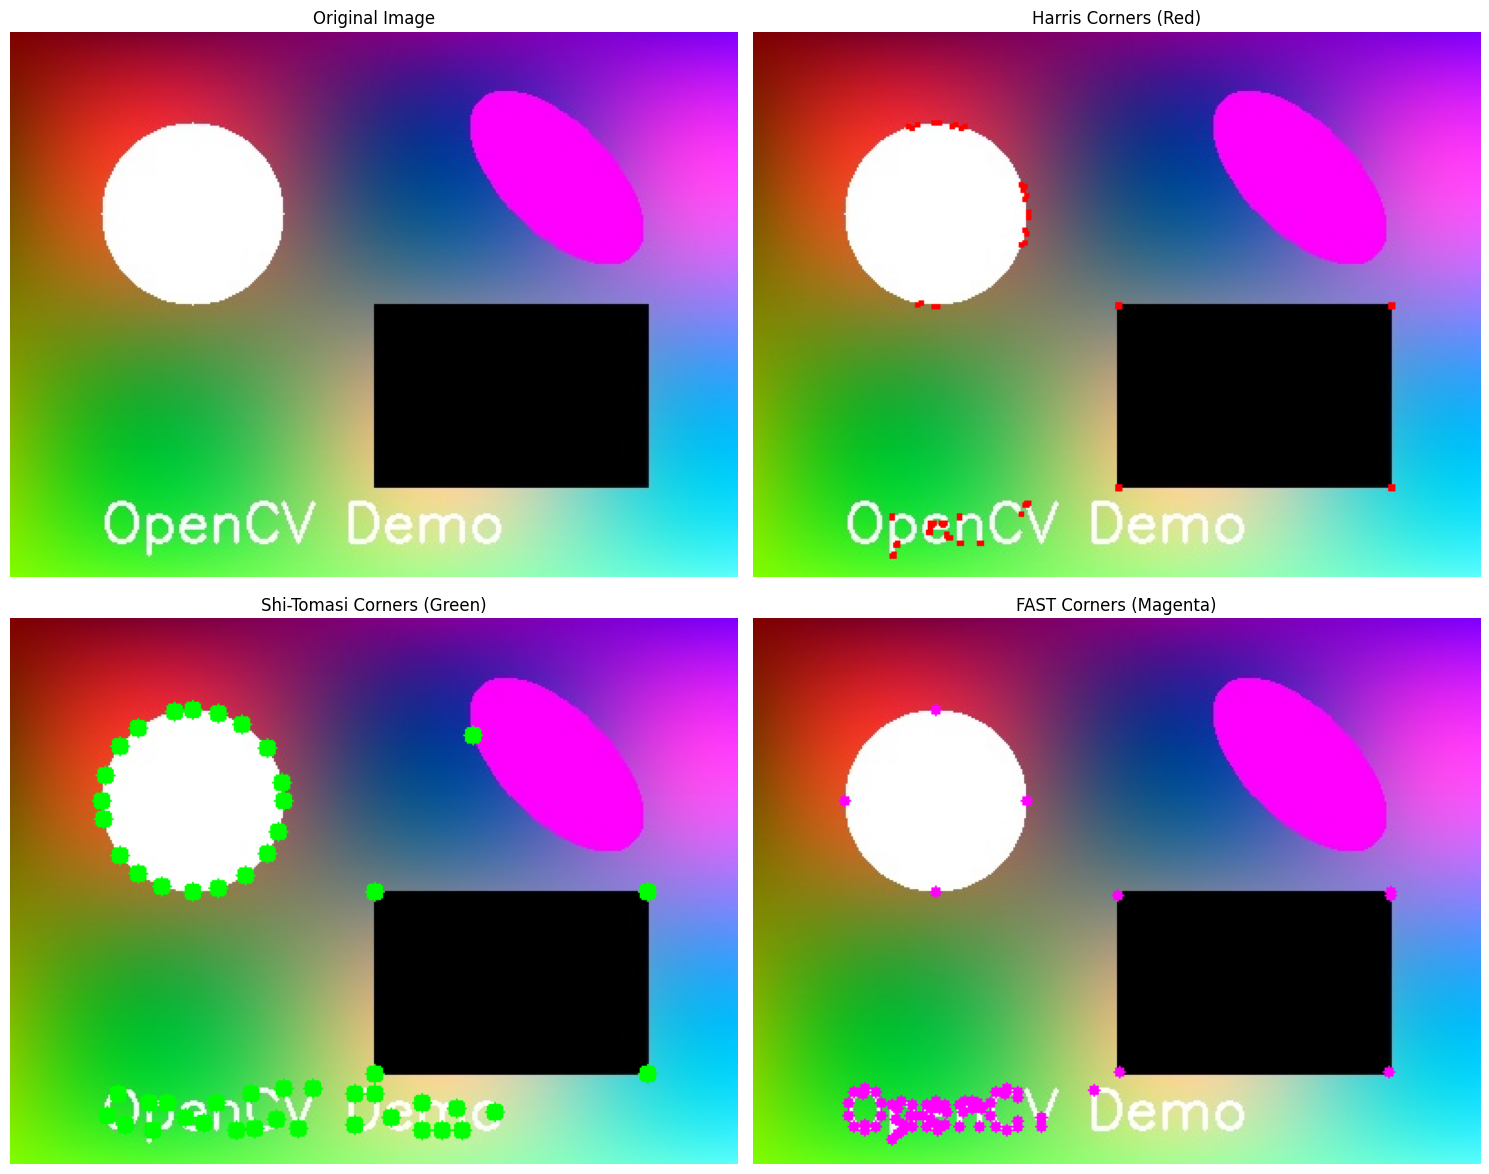

Corner Detection Comparison:
Harris: 436 corners
Shi-Tomasi: 51 corners
FAST: 68 corners


In [17]:
# Compare all corner detection methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Harris
axes[0, 1].imshow(cv2.cvtColor(image_with_harris, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title(f'Harris Corners (Red)')
axes[0, 1].axis('off')

# Shi-Tomasi
axes[1, 0].imshow(cv2.cvtColor(image_with_shi_tomasi, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title(f'Shi-Tomasi Corners (Green)')
axes[1, 0].axis('off')

# FAST
axes[1, 1].imshow(cv2.cvtColor(image_with_fast, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title(f'FAST Corners (Magenta)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print comparison
print("Corner Detection Comparison:")
print(f"Harris: {np.sum(harris_corners > 0.01 * harris_corners.max())} corners")
print(f"Shi-Tomasi: {len(corners_shi_tomasi) if corners_shi_tomasi is not None else 0} corners")
print(f"FAST: {len(fast_keypoints)} corners")

## 3. Keypoint Detection {#keypoints}

Keypoint detectors find distinctive points that can be reliably identified across different images.

### 3.1 SIFT (Scale-Invariant Feature Transform)
Detects keypoints that are invariant to scale, rotation, and partially invariant to illumination changes.

In [18]:
# Apply SIFT keypoint detection
try:
    sift_keypoints, sift_descriptors = keypoint_detection.sift_detection(gray_image)
    
    # Draw SIFT keypoints
    image_with_sift = cv2.drawKeypoints(
        image, sift_keypoints, None, 
        flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
    )
    
    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(image_with_sift, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'SIFT Keypoints - {len(sift_keypoints)} detected')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"SIFT keypoints detected: {len(sift_keypoints)}")
    print(f"SIFT descriptor shape: {sift_descriptors.shape if sift_descriptors is not None else 'None'}")
    
except Exception as e:
    print(f"SIFT detection failed: {e}")
    print("Note: SIFT might not be available in your OpenCV build")
    sift_keypoints, sift_descriptors = [], None

SIFT detection failed: module 'feature_detection.keypoint_detection' has no attribute 'sift_detection'
Note: SIFT might not be available in your OpenCV build


### 3.2 ORB (Oriented FAST and Rotated BRIEF)
A free alternative to SIFT/SURF that's fast and works well for many applications.

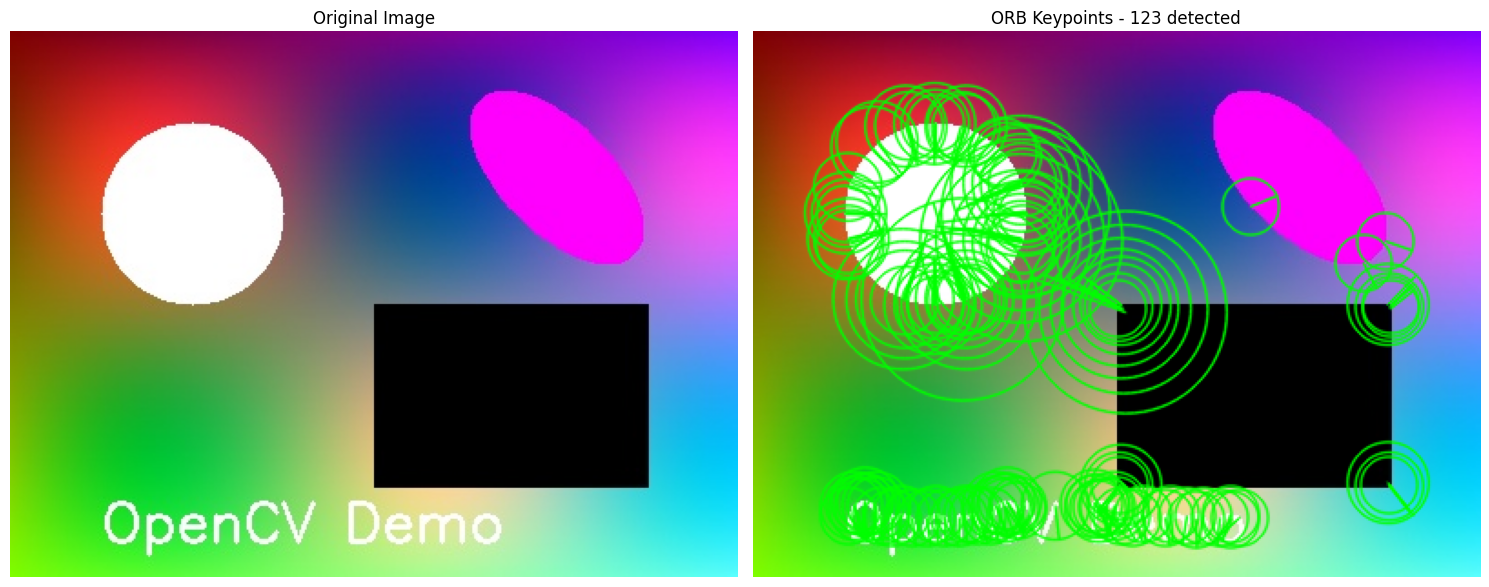

ORB keypoints detected: 123
ORB descriptor shape: (123, 32)


In [19]:
# Apply ORB keypoint detection
orb_keypoints, orb_descriptors = keypoint_detection.detect_orb(
    gray_image, 
    n_features=500
)

# Draw ORB keypoints
image_with_orb = cv2.drawKeypoints(
    image, orb_keypoints, None, 
    color=(0, 255, 0), 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image_with_orb, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'ORB Keypoints - {len(orb_keypoints)} detected')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"ORB keypoints detected: {len(orb_keypoints)}")
print(f"ORB descriptor shape: {orb_descriptors.shape if orb_descriptors is not None else 'None'}")

### 3.3 AKAZE Keypoint Detection
Another scale and rotation invariant detector.

In [20]:
# Apply AKAZE keypoint detection
try:
    akaze_keypoints, akaze_descriptors = keypoint_detection.akaze_detection(gray_image)
    
    # Draw AKAZE keypoints
    image_with_akaze = cv2.drawKeypoints(
        image, akaze_keypoints, None, 
        color=(255, 0, 0), 
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    
    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(image_with_akaze, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'AKAZE Keypoints - {len(akaze_keypoints)} detected')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"AKAZE keypoints detected: {len(akaze_keypoints)}")
    print(f"AKAZE descriptor shape: {akaze_descriptors.shape if akaze_descriptors is not None else 'None'}")
    
except Exception as e:
    print(f"AKAZE detection failed: {e}")
    akaze_keypoints, akaze_descriptors = [], None

AKAZE detection failed: module 'feature_detection.keypoint_detection' has no attribute 'akaze_detection'


## 4. Contour Detection and Analysis {#contours}

Contours are curves joining continuous points having the same color or intensity.

### 4.1 Finding Contours

In [ ]:
# Create a binary image for contour detection
# Apply threshold to get binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = contour_detection.find_contours(binary_image)

# Draw contours
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Contours Detected - {len(contours)} contours')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Number of contours found: {len(contours)}")

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


### 4.2 Contour Analysis
Analyzing contour properties like area, perimeter, and shape characteristics.

In [ ]:
# Analyze contours
if contours:
    # Get the largest contours
    largest_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
    
    # Analyze each contour
    contour_analysis = []
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]
    
    analysis_image = image.copy()
    
    for i, contour in enumerate(largest_contours):
        # Calculate contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Approximate contour
        epsilon = 0.02 * perimeter
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # Calculate bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        
        # Calculate aspect ratio
        aspect_ratio = float(w) / h
        
        # Calculate extent (ratio of contour area to bounding rectangle area)
        rect_area = w * h
        extent = float(area) / rect_area
        
        # Calculate solidity (ratio of contour area to convex hull area)
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)
        solidity = float(area) / hull_area if hull_area > 0 else 0
        
        contour_analysis.append({
            'contour_id': i,
            'area': area,
            'perimeter': perimeter,
            'vertices': len(approx),
            'aspect_ratio': aspect_ratio,
            'extent': extent,
            'solidity': solidity
        })
        
        # Draw contour and bounding rectangle
        cv2.drawContours(analysis_image, [contour], -1, colors[i], 2)
        cv2.rectangle(analysis_image, (x, y), (x + w, y + h), colors[i], 2)
        
        # Draw convex hull
        cv2.drawContours(analysis_image, [hull], -1, colors[i], 1)
        
        # Label the contour
        cv2.putText(analysis_image, f'C{i}', (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[i], 2)
    
    # Display analysis
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(analysis_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Contour Analysis\n(Contours + Bounding Boxes + Convex Hulls)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis results
    print("\nContour Analysis Results:")
    print("-" * 80)
    print(f"{'ID':<3} {'Area':<8} {'Perimeter':<10} {'Vertices':<8} {'Aspect':<7} {'Extent':<7} {'Solidity':<8}")
    print("-" * 80)
    
    for analysis in contour_analysis:
        print(f"{analysis['contour_id']:<3} "
              f"{analysis['area']:<8.1f} "
              f"{analysis['perimeter']:<10.1f} "
              f"{analysis['vertices']:<8} "
              f"{analysis['aspect_ratio']:<7.2f} "
              f"{analysis['extent']:<7.2f} "
              f"{analysis['solidity']:<8.2f}")

### 4.3 Shape Matching
Comparing contours to identify similar shapes.

In [ ]:
# Shape matching example
if len(contours) >= 2:
    # Select reference contour (first large contour)
    reference_contour = largest_contours[0]
    
    # Calculate shape distances to reference
    shape_distances = []
    match_image = image.copy()
    
    # Draw reference contour in red
    cv2.drawContours(match_image, [reference_contour], -1, (0, 0, 255), 3)
    
    for i, contour in enumerate(largest_contours[1:], 1):
        # Calculate Hu moments for shape matching
        distance = contour_detection.match_shapes(reference_contour, contour)
        shape_distances.append((i, distance))
        
        # Color code based on similarity (green = similar, blue = different)
        if distance < 0.1:
            color = (0, 255, 0)  # Green - very similar
        elif distance < 0.3:
            color = (255, 255, 0)  # Yellow - somewhat similar
        else:
            color = (255, 0, 0)  # Blue - different
        
        cv2.drawContours(match_image, [contour], -1, color, 2)
        
        # Add distance label
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.putText(match_image, f'{distance:.3f}', (cx-20, cy), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    # Display shape matching results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Shape Matching\n(Red=Reference, Green=Similar, Yellow=Somewhat, Blue=Different)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print shape matching results
    print("\nShape Matching Results:")
    print(f"Reference contour: Contour 0 (Red)")
    print("Distance < 0.1: Very similar (Green)")
    print("Distance < 0.3: Somewhat similar (Yellow)")
    print("Distance >= 0.3: Different (Blue)")
    print("-" * 40)
    
    for contour_id, distance in shape_distances:
        similarity = "Very similar" if distance < 0.1 else "Somewhat similar" if distance < 0.3 else "Different"
        print(f"Contour {contour_id}: Distance = {distance:.4f} ({similarity})")

## 5. Feature Matching {#matching}

Matching features between different images or different views of the same scene.

### 5.1 ORB Feature Matching

In [ ]:
# Create a second image by rotating and scaling the first
height, width = image.shape[:2]
center = (width // 2, height // 2)

# Rotation and scaling transformation
M = cv2.getRotationMatrix2D(center, 15, 0.8)
image2 = cv2.warpAffine(image, M, (width, height))

# Add some noise to make matching more challenging
noise = np.random.normal(0, 10, image2.shape).astype(np.uint8)
image2 = cv2.add(image2, noise)

# Convert to grayscale
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect ORB features in both images
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match features
if des1 is not None and des2 is not None:
    # Create BF matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    
    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Draw matches
    match_image = cv2.drawMatches(
        image, kp1, image2, kp2, matches[:50], None, 
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    
    # Display results
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Show both images
    combined_images = np.hstack([
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    ])
    axes[0].imshow(combined_images)
    axes[0].set_title(f'Original Image (left) vs Transformed Image (right)')
    axes[0].axis('off')
    
    # Show matches
    axes[1].imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'ORB Feature Matches - {len(matches)} total, showing best 50')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Keypoints in image 1: {len(kp1)}")
    print(f"Keypoints in image 2: {len(kp2)}")
    print(f"Good matches found: {len(matches)}")
    
    # Print some match statistics
    distances = [m.distance for m in matches[:20]]
    print(f"Best 20 match distances: {distances}")
    
else:
    print("No descriptors found for matching")

### 5.2 Robust Feature Matching with RANSAC

In [ ]:
# Robust matching using RANSAC to find homography
if des1 is not None and des2 is not None and len(matches) > 10:
    # Extract matched points
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    
    # Find homography using RANSAC
    M_homography, mask = cv2.findHomography(src_pts, dst_pts, 
                                          cv2.RANSAC, 5.0)
    
    # Separate inliers and outliers
    inliers = [matches[i] for i in range(len(matches)) if mask[i]]
    outliers = [matches[i] for i in range(len(matches)) if not mask[i]]
    
    # Draw only inlier matches
    inlier_match_image = cv2.drawMatches(
        image, kp1, image2, kp2, inliers, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    
    # Draw the found homography
    if M_homography is not None:
        h, w = gray1.shape
        corners = np.float32([[0, 0], [w, 0], [w, h], [0, h]]).reshape(-1, 1, 2)
        transformed_corners = cv2.perspectiveTransform(corners, M_homography)
        
        # Draw the transformed quadrilateral on image2
        image2_with_quad = image2.copy()
        cv2.polylines(image2_with_quad, [np.int32(transformed_corners)], True, (0, 255, 0), 3)
    
    # Display results
    fig, axes = plt.subplots(3, 1, figsize=(15, 18))
    
    # All matches
    axes[0].imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f'All ORB Matches - {len(matches)} matches')
    axes[0].axis('off')
    
    # Inlier matches only
    axes[1].imshow(cv2.cvtColor(inlier_match_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'RANSAC Inlier Matches - {len(inliers)} inliers, {len(outliers)} outliers')
    axes[1].axis('off')
    
    # Homography result
    if M_homography is not None:
        axes[2].imshow(cv2.cvtColor(image2_with_quad, cv2.COLOR_BGR2RGB))
        axes[2].set_title('Detected Object (Green Quadrilateral)')
        axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total matches: {len(matches)}")
    print(f"Inlier matches: {len(inliers)}")
    print(f"Outlier matches: {len(outliers)}")
    print(f"Inlier ratio: {len(inliers)/len(matches):.2%}")
    
    if M_homography is not None:
        print(f"\nHomography matrix found:")
        print(M_homography)
    
else:
    print("Not enough matches for homography estimation")

## 6. Practical Applications {#applications}

### 6.1 Object Detection Using Template Matching

In [ ]:
# Template matching example
# Extract a template from the original image
template_x, template_y, template_w, template_h = 250, 50, 150, 100
template = image[template_y:template_y+template_h, template_x:template_x+template_w]

# Search for template in the transformed image
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
result = cv2.matchTemplate(gray2, gray_template, cv2.TM_CCOEFF_NORMED)

# Find best match location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + template_w, top_left[1] + template_h)

# Draw rectangle around detected region
image2_with_detection = image2.copy()
cv2.rectangle(image2_with_detection, top_left, bottom_right, (0, 255, 0), 3)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Template
axes[0, 0].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Template')
axes[0, 0].axis('off')

# Template matching result
axes[0, 1].imshow(result, cmap='hot')
axes[0, 1].set_title(f'Template Matching Result\nBest match: {max_val:.3f}')
axes[0, 1].axis('off')

# Original with template location
image_with_template_marked = image.copy()
cv2.rectangle(image_with_template_marked, (template_x, template_y), 
             (template_x + template_w, template_y + template_h), (255, 0, 0), 3)
axes[1, 0].imshow(cv2.cvtColor(image_with_template_marked, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Original with Template Location (Blue)')
axes[1, 0].axis('off')

# Detection result
axes[1, 1].imshow(cv2.cvtColor(image2_with_detection, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Template Detected (Green)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"Template matching confidence: {max_val:.3f}")
print(f"Detection location: {top_left}")

### 6.2 Feature-based Object Tracking
Simulating object tracking using feature matching.

In [ ]:
# Simulate object tracking across multiple frames
def create_simulated_frames(base_image, n_frames=5):
    """Create simulated video frames with moving/rotating objects."""
    frames = []
    height, width = base_image.shape[:2]
    
    for i in range(n_frames):
        # Apply different transformations to simulate movement
        angle = i * 5  # Rotation
        scale = 1.0 + i * 0.05  # Scaling
        tx = i * 10  # Translation X
        ty = i * 5   # Translation Y
        
        # Create transformation matrix
        center = (width // 2, height // 2)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        M[0, 2] += tx
        M[1, 2] += ty
        
        # Apply transformation
        transformed = cv2.warpAffine(base_image, M, (width, height))
        
        # Add some noise
        noise = np.random.normal(0, 5, transformed.shape).astype(np.uint8)
        transformed = cv2.add(transformed, noise)
        
        frames.append(transformed)
    
    return frames

# Create simulated frames
frames = create_simulated_frames(image, 4)

# Track features across frames
orb = cv2.ORB_create(nfeatures=200)

# Detect features in first frame
gray_first = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
kp_first, des_first = orb.detectAndCompute(gray_first, None)

# Track across subsequent frames
tracking_results = []

for i, frame in enumerate(frames[1:], 1):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp_frame, des_frame = orb.detectAndCompute(gray_frame, None)
    
    if des_first is not None and des_frame is not None:
        # Match features
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des_first, des_frame)
        matches = sorted(matches, key=lambda x: x.distance)
        
        # Keep good matches
        good_matches = [m for m in matches if m.distance < 30]
        
        tracking_results.append({
            'frame': i,
            'keypoints': len(kp_frame),
            'matches': len(good_matches),
            'match_image': cv2.drawMatches(
                frames[0], kp_first, frame, kp_frame, 
                good_matches[:20], None,
                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
            )
        })

# Display tracking results
fig, axes = plt.subplots(len(tracking_results), 1, figsize=(15, 5 * len(tracking_results)))

if len(tracking_results) == 1:
    axes = [axes]

for i, result in enumerate(tracking_results):
    axes[i].imshow(cv2.cvtColor(result['match_image'], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Frame {result['frame']}: {result['keypoints']} keypoints, "
                     f"{result['matches']} matches (showing best 20)")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print tracking statistics
print("Feature Tracking Results:")
print("-" * 50)
print(f"{'Frame':<6} {'Keypoints':<10} {'Matches':<8}")
print("-" * 50)
for result in tracking_results:
    print(f"{result['frame']:<6} {result['keypoints']:<10} {result['matches']:<8}")

## 7. Exercises {#exercises}

Try these exercises to practice feature detection techniques:

### Exercise 1: Multi-Scale Feature Detection
Detect features at multiple scales and analyze the results.

In [ ]:
# Exercise 1: Multi-scale feature detection
def detect_features_at_scales(image, scales=[0.5, 1.0, 1.5, 2.0]):
    """Detect ORB features at multiple scales."""
    results = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    for scale in scales:
        # Resize image
        width = int(image.shape[1] * scale)
        height = int(image.shape[0] * scale)
        scaled_image = cv2.resize(gray, (width, height))
        
        # Detect features
        orb = cv2.ORB_create(nfeatures=200)
        keypoints, descriptors = orb.detectAndCompute(scaled_image, None)
        
        # Scale keypoints back to original size
        scaled_keypoints = []
        for kp in keypoints:
            scaled_kp = cv2.KeyPoint(
                x=kp.pt[0] / scale,
                y=kp.pt[1] / scale,
                size=kp.size / scale,
                angle=kp.angle,
                response=kp.response,
                octave=kp.octave,
                class_id=kp.class_id
            )
            scaled_keypoints.append(scaled_kp)
        
        results.append({
            'scale': scale,
            'keypoints': scaled_keypoints,
            'count': len(scaled_keypoints)
        })
    
    return results

# Apply multi-scale detection
scale_results = detect_features_at_scales(image)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]

for i, result in enumerate(scale_results):
    if i < 4:  # Only show first 4 scales
        # Draw keypoints
        image_with_kp = image.copy()
        for kp in result['keypoints']:
            center = (int(kp.pt[0]), int(kp.pt[1]))
            radius = max(1, int(kp.size / 4))
            cv2.circle(image_with_kp, center, radius, colors[i], 2)
        
        axes[i].imshow(cv2.cvtColor(image_with_kp, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Scale {result['scale']}: {result['count']} features")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print scale analysis
print("Multi-Scale Feature Detection Results:")
print("-" * 40)
print(f"{'Scale':<8} {'Features':<10} {'Density':<10}")
print("-" * 40)

for result in scale_results:
    density = result['count'] / (image.shape[0] * image.shape[1] / 1000)  # per 1000 pixels
    print(f"{result['scale']:<8.1f} {result['count']:<10} {density:<10.2f}")

### Exercise 2: Feature Stability Analysis
Analyze how stable features are across different transformations.

In [ ]:
# Exercise 2: Feature stability analysis
def analyze_feature_stability(base_image, transformations):
    """Analyze feature stability across different transformations."""
    gray_base = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=300)
    
    # Detect features in base image
    kp_base, des_base = orb.detectAndCompute(gray_base, None)
    
    stability_results = []
    
    for trans_name, trans_func in transformations.items():
        # Apply transformation
        transformed_image = trans_func(base_image)
        gray_trans = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)
        
        # Detect features in transformed image
        kp_trans, des_trans = orb.detectAndCompute(gray_trans, None)
        
        if des_base is not None and des_trans is not None:
            # Match features
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches = bf.match(des_base, des_trans)
            
            # Count good matches
            good_matches = [m for m in matches if m.distance < 30]
            
            # Calculate stability metrics
            stability_ratio = len(good_matches) / len(kp_base) if len(kp_base) > 0 else 0
            
            stability_results.append({
                'transformation': trans_name,
                'base_features': len(kp_base),
                'trans_features': len(kp_trans),
                'matches': len(good_matches),
                'stability_ratio': stability_ratio,
                'transformed_image': transformed_image
            })
    
    return stability_results

# Define transformations
def rotation_15(img):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 15, 1.0)
    return cv2.warpAffine(img, M, (w, h))

def scale_80(img):
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w*0.8), int(h*0.8)))

def brightness_change(img):
    return cv2.convertScaleAbs(img, alpha=1.2, beta=20)

def blur_effect(img):
    return cv2.GaussianBlur(img, (7, 7), 0)

transformations = {
    'Rotation 15°': rotation_15,
    'Scale 80%': scale_80,
    'Brightness +20%': brightness_change,
    'Blur (7x7)': blur_effect
}

# Analyze stability
stability_results = analyze_feature_stability(image, transformations)

# Visualize results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Show transformed images
positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
for i, result in enumerate(stability_results):
    if i < 4:
        row, col = positions[i]
        axes[row, col].imshow(cv2.cvtColor(result['transformed_image'], cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f"{result['transformation']}\n"
                                f"Stability: {result['stability_ratio']:.2%}")
        axes[row, col].axis('off')

# Create stability chart
axes[1, 2].bar([r['transformation'] for r in stability_results], 
               [r['stability_ratio'] for r in stability_results])
axes[1, 2].set_title('Feature Stability Ratios')
axes[1, 2].set_ylabel('Stability Ratio')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print stability analysis
print("Feature Stability Analysis:")
print("-" * 70)
print(f"{'Transformation':<15} {'Base':<6} {'Trans':<6} {'Matches':<8} {'Stability':<10}")
print("-" * 70)

for result in stability_results:
    print(f"{result['transformation']:<15} "
          f"{result['base_features']:<6} "
          f"{result['trans_features']:<6} "
          f"{result['matches']:<8} "
          f"{result['stability_ratio']:<10.2%}")

### Exercise 3: Custom Feature Descriptor
Create a simple custom feature descriptor.

In [ ]:
# Exercise 3: Custom feature descriptor
def simple_patch_descriptor(image, keypoint, patch_size=16):
    """Create a simple patch-based descriptor around a keypoint."""
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
    half_size = patch_size // 2
    
    # Check bounds
    if (x - half_size < 0 or x + half_size >= image.shape[1] or 
        y - half_size < 0 or y + half_size >= image.shape[0]):
        return None
    
    # Extract patch
    patch = image[y-half_size:y+half_size, x-half_size:x+half_size]
    
    # Create descriptor from patch statistics
    descriptor = np.array([
        np.mean(patch),              # Mean intensity
        np.std(patch),               # Standard deviation
        np.mean(patch[:half_size, :]),  # Top half mean
        np.mean(patch[half_size:, :]),  # Bottom half mean
        np.mean(patch[:, :half_size]),  # Left half mean
        np.mean(patch[:, half_size:]),  # Right half mean
        np.mean(np.gradient(patch.astype(float))[0]),  # Gradient X
        np.mean(np.gradient(patch.astype(float))[1]),  # Gradient Y
    ])
    
    return descriptor

def match_custom_descriptors(desc1, desc2, threshold=50):
    """Match custom descriptors using Euclidean distance."""
    matches = []
    
    for i, d1 in enumerate(desc1):
        if d1 is not None:
            best_distance = float('inf')
            best_match = -1
            
            for j, d2 in enumerate(desc2):
                if d2 is not None:
                    distance = np.linalg.norm(d1 - d2)
                    if distance < best_distance:
                        best_distance = distance
                        best_match = j
            
            if best_distance < threshold:
                matches.append((i, best_match, best_distance))
    
    return matches

# Detect corners for custom descriptor
corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, 
                                 qualityLevel=0.01, minDistance=10)

if corners is not None:
    # Convert to keypoints
    keypoints = [cv2.KeyPoint(x[0][0], x[0][1], 10) for x in corners]
    
    # Create custom descriptors
    custom_descriptors = []
    for kp in keypoints:
        desc = simple_patch_descriptor(gray_image, kp)
        custom_descriptors.append(desc)
    
    # Create transformed image for matching
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 10, 0.9)
    image_transformed = cv2.warpAffine(image, M, (w, h))
    gray_transformed = cv2.cvtColor(image_transformed, cv2.COLOR_BGR2GRAY)
    
    # Detect corners in transformed image
    corners_trans = cv2.goodFeaturesToTrack(gray_transformed, maxCorners=100,
                                           qualityLevel=0.01, minDistance=10)
    
    if corners_trans is not None:
        # Convert to keypoints
        keypoints_trans = [cv2.KeyPoint(x[0][0], x[0][1], 10) for x in corners_trans]
        
        # Create descriptors for transformed image
        custom_descriptors_trans = []
        for kp in keypoints_trans:
            desc = simple_patch_descriptor(gray_transformed, kp)
            custom_descriptors_trans.append(desc)
        
        # Match descriptors
        matches = match_custom_descriptors(custom_descriptors, custom_descriptors_trans)
        
        # Visualize results
        match_image = np.hstack([image, image_transformed])
        
        # Draw matches
        for i, (idx1, idx2, distance) in enumerate(matches[:20]):  # Show first 20 matches
            pt1 = keypoints[idx1].pt
            pt2 = keypoints_trans[idx2].pt
            
            # Adjust pt2 for concatenated image
            pt2_adjusted = (pt2[0] + w, pt2[1])
            
            # Draw line
            cv2.line(match_image, 
                    (int(pt1[0]), int(pt1[1])), 
                    (int(pt2_adjusted[0]), int(pt2_adjusted[1])),
                    (0, 255, 0), 2)
            
            # Draw circles
            cv2.circle(match_image, (int(pt1[0]), int(pt1[1])), 5, (255, 0, 0), -1)
            cv2.circle(match_image, (int(pt2_adjusted[0]), int(pt2_adjusted[1])), 5, (255, 0, 0), -1)
        
        # Display results
        plt.figure(figsize=(15, 8))
        plt.imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Custom Descriptor Matching\n{len(matches)} matches found (showing first 20)')
        plt.axis('off')
        plt.show()
        
        # Print results
        print("Custom Feature Descriptor Results:")
        print(f"Keypoints in image 1: {len(keypoints)}")
        print(f"Keypoints in image 2: {len(keypoints_trans)}")
        print(f"Custom matches found: {len(matches)}")
        
        if matches:
            distances = [m[2] for m in matches[:10]]
            print(f"Top 10 match distances: {distances}")
            print(f"Average match distance: {np.mean([m[2] for m in matches]):.2f}")

else:
    print("No corners detected for custom descriptor matching")

## Summary

In this notebook, we explored:

1. **Corner Detection**: Harris, Shi-Tomasi, and FAST corner detectors
2. **Keypoint Detection**: SIFT, ORB, and AKAZE feature detectors
3. **Contour Detection**: Finding and analyzing object boundaries and shapes
4. **Feature Matching**: Matching features between images using various algorithms
5. **Practical Applications**: Template matching, object tracking, and homography estimation
6. **Advanced Techniques**: Multi-scale detection, stability analysis, and custom descriptors

### Key Takeaways:
- Different feature detectors are suitable for different applications
- Corner detectors find intersection points of edges
- Keypoint detectors find distinctive points with descriptors for matching
- Contour analysis provides shape and geometric information
- Feature matching enables object recognition and tracking
- RANSAC improves robustness in feature matching
- Custom descriptors can be designed for specific applications

### Best Practices:
- Choose detectors based on your specific requirements (speed vs. accuracy)
- Use RANSAC for robust geometric estimation
- Filter matches based on distance thresholds
- Consider multi-scale approaches for better feature detection
- Analyze feature stability for your specific transformations
- Combine multiple feature types for better performance

### Next Steps:
- Experiment with different detector parameters
- Try feature detection on your own images
- Implement real-time feature tracking
- Explore deep learning-based feature detectors
- Apply these techniques to specific computer vision tasks
- Combine feature detection with machine learning for object recognition